In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

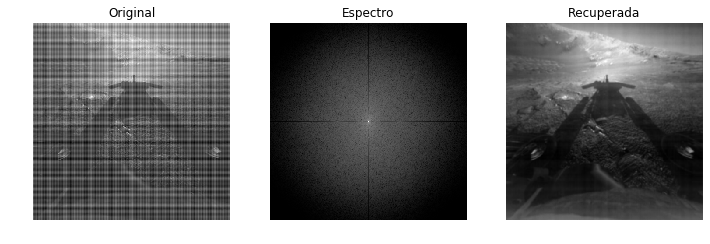

In [0]:
img = cv2.imread("MarteC.jpeg", 0)
imgf = np.fft.fft2(img)
imgf = np.fft.fftshift(imgf)

r, c = img.shape
cr, cc = r//2, c//2

mask = np.zeros((r, c))

desv = 90
for i in range(r):
  for j in range(c):
    mask[i,j] = np.exp( -((cr - i)**2 + (cc - j)**2)/(desv**2))
    if(i == r//2 or j == c//2):
      mask[i,j]/= ( ((i - r//2)**2 +  (j - c//2)**2)**0.5 + 0.001)
  
imgf*=mask

mag = 20 * np.log(1 + np.abs(imgf))

f_s = np.fft.ifftshift(imgf)
img_back = np.abs(np.fft.ifft2(f_s))

plt.figure(figsize=[12,12])
plt.subplot(1,3,1), plt.axis("off"), plt.imshow(img, cmap = "gray"), plt.title("Original")
plt.subplot(1,3,2), plt.axis("off"), plt.imshow(mag, cmap = "gray"), plt.title("Espectro")
plt.subplot(1,3,3), plt.axis("off"), plt.imshow(img_back, cmap = "gray"), plt.title("Recuperada")

plt.show()